In [67]:
import pandas as pd
df = pd.read_csv(r"C:\Users\SWAROOP\.cache\kagglehub\datasets\imdevskp\corona-virus-report\versions\166\country_wise_latest.csv")

In [69]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [71]:
print(df.describe())

          Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173    4197.719635      

In [73]:
# Check for missing values
print(df.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


# Top 10 Countries by Confirmed Cases

In [77]:
top_confirmed = df.sort_values(by="Confirmed", ascending=False).head(10)
print(top_confirmed[["Country/Region", "Confirmed"]])

     Country/Region  Confirmed
173              US    4290259
23           Brazil    2442375
79            India    1480073
138          Russia     816680
154    South Africa     452529
111          Mexico     395489
132            Peru     389717
35            Chile     347923
177  United Kingdom     301708
81             Iran     293606


# Top 10 Countries by Highest Death Rate (per 100 cases)

In [79]:
top_death_rate = df.sort_values(by="Deaths / 100 Cases", ascending=False).head(10)
print(top_death_rate[["Country/Region", "Deaths / 100 Cases"]])

     Country/Region  Deaths / 100 Cases
184           Yemen               28.56
177  United Kingdom               15.19
16          Belgium               14.79
85            Italy               14.26
61           France               13.71
77          Hungary               13.40
120     Netherlands               11.53
111          Mexico               11.13
157           Spain               10.44
183  Western Sahara               10.00


# Top 10 Countries by Highest Recovery Rate

top_recovery_rate = df.sort_values(by="Recovered / 100 Cases", ascending=False).head(10)
print(top_recovery_rate[["Country/Region", "Recovered / 100 Cases"]])

# Region-wise Summary (Confirmed, Deaths, Recovered, Active)

In [37]:
region_summary = df.groupby("WHO Region")[["Confirmed", "Deaths", "Recovered", "Active"]].sum()
print(region_summary.sort_values(by="Confirmed", ascending=False))


                       Confirmed  Deaths  Recovered   Active
WHO Region                                                  
Americas                 8839286  342732    4468616  4027938
Europe                   3299523  211144    1993723  1094656
South-East Asia          1835297   41349    1156933   637015
Eastern Mediterranean    1490744   38339    1201400   251005
Africa                    723207   12223     440645   270339
Western Pacific           292428    8249     206770    77409


# global distribution of confirmed/death/recovered

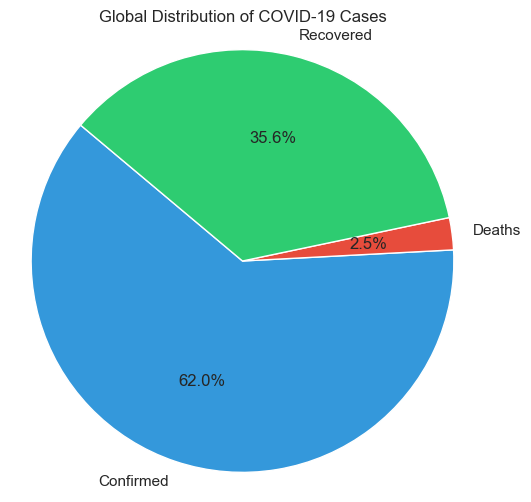

In [97]:
global_totals = df[["Confirmed", "Deaths", "Recovered"]].sum()
# Plot pie chart
plt.figure(figsize=(6, 6))
colors = ["#3498db", "#e74c3c", "#2ecc71"]
plt.pie(global_totals, labels=global_totals.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Global Distribution of COVID-19 Cases')
plt.axis('equal')  # Ensures the pie is a circle
plt.show()


# K-means Clustering of Countries by COVID-19 Data

C:\Users\SWAROOP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


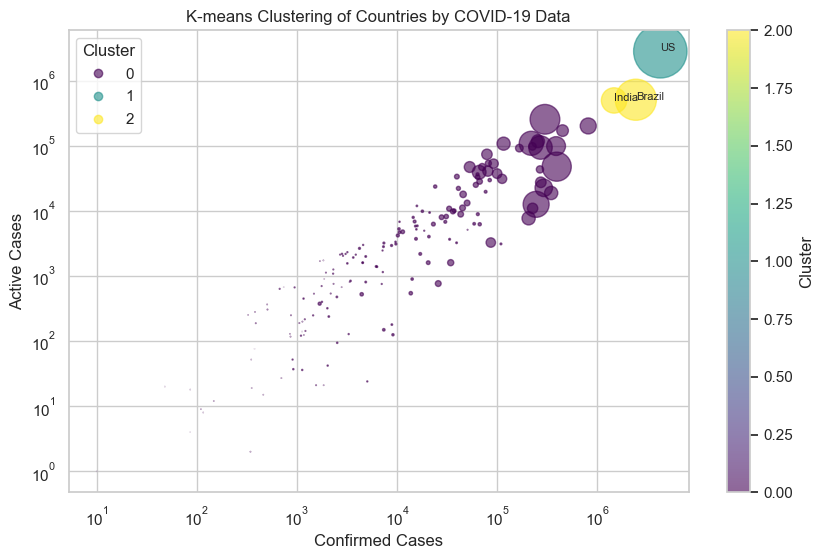

Clustering Summary:
          Confirmed     Deaths   Recovered      Active
Cluster                                               
0          44933.58    2092.39    29046.07    13795.12
1        4290259.00  148011.00  1325804.00  2816444.00
2        1961224.00   60513.00  1398903.50   501807.50


In [94]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Select features for clustering
features = ['Confirmed', 'Deaths', 'Recovered', 'Active']
data = df[features].copy()


# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Confirmed'], df['Active'], c=df['Cluster'], cmap='viridis',
                     s=df['Deaths'] / 100, alpha=0.6)  # Size by Deaths
plt.xscale('log')  # Log scale for better visualization
plt.yscale('log')
plt.xlabel('Confirmed Cases')
plt.ylabel('Active Cases')
plt.title('K-means Clustering of Countries by COVID-19 Data')
plt.colorbar(label='Cluster')
plt.legend(*scatter.legend_elements(), title='Cluster')

# Add annotations for a few countries
for i, country in enumerate(df['Country/Region']):
    if df['Confirmed'][i] > 1000000 or df['Active'][i] > 500000:
        plt.annotate(country, (df['Confirmed'][i], df['Active'][i]), fontsize=8)

plt.show()

# Summary of clustering results
print("Clustering Summary:")
cluster_summary = df.groupby('Cluster')[features].mean().round(2)
print(cluster_summary)


# Recovery rate calculation

In [100]:
df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed'] * 100).where(df['Confirmed'] != 0, 0)

# Round to 2 decimal places for readability
df['Recovery_Rate'] = df['Recovery_Rate'].round(2)

# Display the DataFrame with the new column
print(df[['Country/Region', 'Confirmed', 'Recovered', 'Recovery_Rate']])


         Country/Region  Confirmed  Recovered  Recovery_Rate
0           Afghanistan      36263      25198          69.49
1               Albania       4880       2745          56.25
2               Algeria      27973      18837          67.34
3               Andorra        907        803          88.53
4                Angola        950        242          25.47
..                  ...        ...        ...            ...
182  West Bank and Gaza      10621       3752          35.33
183      Western Sahara         10          8          80.00
184               Yemen       1691        833          49.26
185              Zambia       4552       2815          61.84
186            Zimbabwe       2704        542          20.04

[187 rows x 4 columns]


# Compute correlations between variables Confirmed vs. Deaths, New cases vs. 1 week % increase to identify relationships.

Correlation between Confirmed and Deaths: 0.9347
Correlation between New cases and 1 week % increase: 0.0308


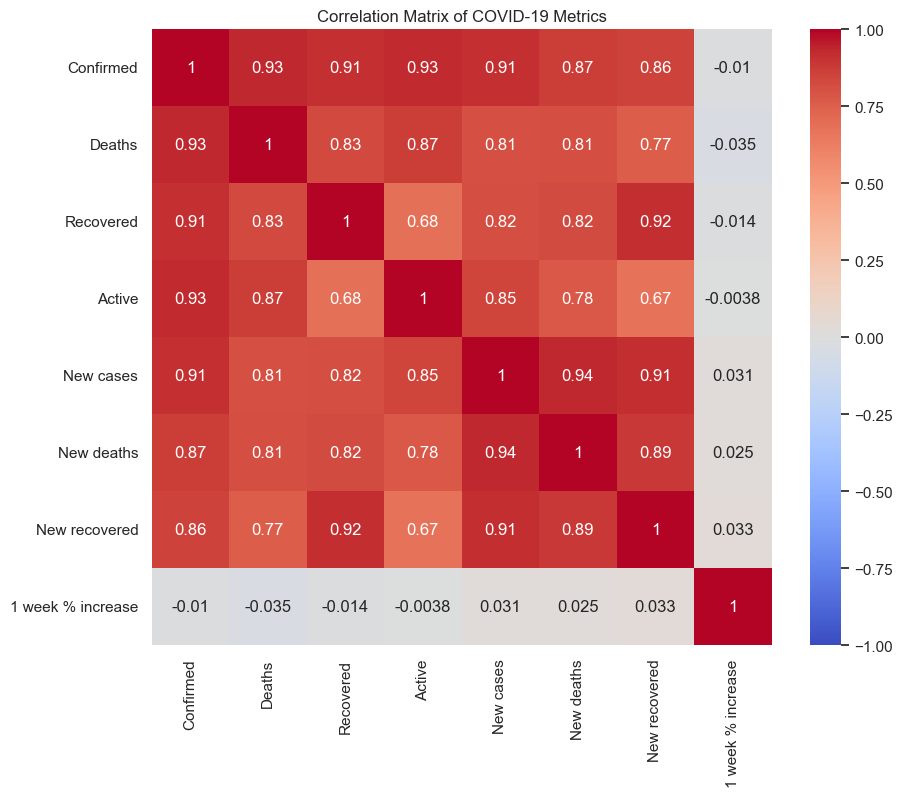

In [106]:
numerical_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 
                  'New deaths', 'New recovered', '1 week % increase']

# Compute the correlation matrix using Pearson correlation
correlation_matrix = df[numerical_cols].corr()


print("Correlation between Confirmed and Deaths:", 
      correlation_matrix.loc['Confirmed', 'Deaths'].round(4))
print("Correlation between New cases and 1 week % increase:", 
      correlation_matrix.loc['New cases', '1 week % increase'].round(4))


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of COVID-19 Metrics')
plt.show()